In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def plot_heatmap(Pq2_path, U):
    file = h5py.File(Pq2_path)
    data = np.array(file["Pmn2_avg"])
    U_index = list(file["U"]).index(U)

    plt.imshow(np.transpose(np.log10(abs(data[U_index,::-1,::-1]))), vmin=-5, vmax=0, origin='lower')
    plt.colorbar()
    plt.xlabel("$N_{A\\downarrow}$")
    plt.ylabel("$N_{A\\uparrow}$")
    plt.title("$U={}$".format(U))
    plt.show()

In [9]:
def plot_distribution(Pq2_path, U):
    file = h5py.File(Pq2_path)
    avg_n = np.array(file["Pn2_avg"])
    avg_m = np.array(file["Pm2_avg"])
    err_n = np.array(file["Pn2_err"])
    err_m = np.array(file["Pm2_err"])
    U_index = list(file["U"]).index(U)

    plt.errorbar(range(len(avg_n[U_index, :])), np.flip(avg_n[U_index, :]), yerr=err_n[U_index, :], label="$P_{n,2}$")
    plt.errorbar(range(-int((len(avg_m[U_index, :])-1)/2), int((len(avg_m[U_index, :])-1)/2 + 1)), avg_m[U_index, :], yerr=err_m[U_index, :], label="$P_{m,2}$")
    plt.ylim(top=1.0,bottom=0.0)
    plt.xlabel("$q_A$")
    plt.ylabel("P")
    plt.legend()
    plt.title("$U={}$".format(U))
    plt.show()

In [40]:
def plot_shannon(Hq2_path):
    file = h5py.File(Hq2_path)
    avg_n = np.array(file["Hn2_avg"])
    avg_m = np.array(file["Hm2_avg"])
    err_n = np.array(file["Hn2_err"])
    err_m = np.array(file["Hm2_err"])
    absU_list = abs(np.array(file["U"]))

    plt.errorbar(absU_list, avg_n, yerr=err_n, label="$H_{n,1/2}$")
    plt.errorbar(absU_list, avg_m, yerr=err_m, label="$H_{m,1/2}$")
    plt.xlim(left=0.0, right=max(absU_list))
    plt.xlabel("$|U|$")
    plt.ylabel("$H_{q,1/2}$")
    plt.legend()
    plt.title("Shannon Entropy")
    plt.show()

In [36]:
def plot_etgent(EtgEnt_path, Hq2_path):
    file_etgent = h5py.File(EtgEnt_path)
    file_hq2 = h5py.File(Hq2_path)
    absU_list = abs(np.array(file_etgent["U"]))

    avg_etgent = np.array(file_etgent["S2_avg"])
    err_etgent = np.array(file_etgent["S2_err"])

    avg_hn2 = np.array(file_hq2["Hn2_avg"])
    avg_hm2 = np.array(file_hq2["Hm2_avg"])
    err_hn2 = np.array(file_hq2["Hn2_err"])
    err_hm2 = np.array(file_hq2["Hm2_err"])

    plt.errorbar(absU_list, avg_etgent, yerr=err_etgent, label="$S_2$", linestyle='dashed', linewidth=2.0)
    plt.errorbar(absU_list, avg_hn2, yerr=err_hn2, label="$H_{n, 1/2}$", linestyle='dotted', linewidth=3.0)
    plt.errorbar(absU_list, avg_hm2, yerr=err_hm2, label="$H_{m, 1/2}$", linestyle='dotted', linewidth=3.0)
    plt.errorbar(absU_list, avg_etgent-avg_hn2, yerr=np.sqrt(err_etgent**2 + err_hn2**2), label="$S_{n,2}^\\text{acc}$")
    plt.errorbar(absU_list, avg_etgent-avg_hm2, yerr=np.sqrt(err_etgent**2 + err_hm2**2), label="$S_{m,2}^\\text{acc}$")
    plt.xlim(left=0.0, right=max(absU_list))
    plt.xlabel("$|U|$")
    plt.ylabel("Entropy")
    plt.legend()
    plt.title("Entanglement Entropies for the Attractive Hubbard Model")
    # plt.show()
    plt.savefig("attractive.svg", format="svg")

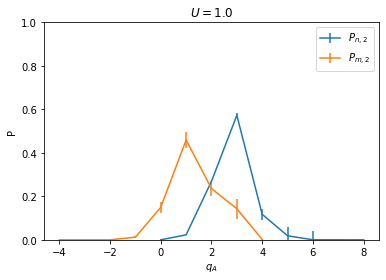

In [10]:
plot_distribution("./data/Pq2_LA4_N12_beta18.0.jld", 1.0)

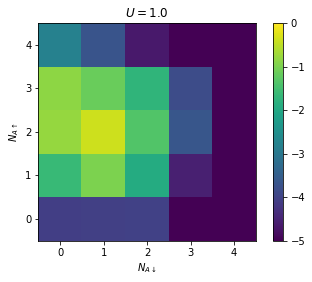

In [11]:
plot_heatmap("./data/Pq2_LA4_N12_beta18.0.jld", 1.0)